In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

%matplotlib inline

In [2]:
aepsi_data = pd.read_csv('../data/cleaned_AEPS.csv')
aepsi_data

C:\Users\dhana\AppData\Local\Temp\ipykernel_19620\3308152209.py:1: DtypeWarning: Columns (0,3,279,282,285,288) have mixed types. Specify dtype option on import or set low_memory=False.
  aepsi_data = pd.read_csv('../data/cleaned_AEPS.csv')


,Child ID,Program Name,AEPSi ID,AssessID,State,Child First,Child Last,DOB,Gender,Dev Status,...,Adapt Result,Cog Goal Score,Cog Cutoff,Cog Result,SC Goal Score,SC Cutoff,SC Result,Soc Goal Score,Soc Cutoff,Soc Result
0,11,Signal Centers,722747,10584304,TN,XXXXXX,XXXXXX,2020-02-02 00:00:00,M,Dev. Delay or Disability,...,above,17.0,20.0,below,11.0,13.0,below,9.0,9.0,below
1,10724,Little Tennessee Valley Educational Cooperative,707878,10575064,TN,XXXXXX,XXXXXX,2021-07-30 00:00:00,F,Dev. Delay or Disability,...,above,3.0,4.0,below,2.0,3.0,below,0.0,1.0,below
2,10724,Little Tennessee Valley Educational Cooperative,707878,10589703,TN,XXXXXX,XXXXXX,2021-07-30 00:00:00,F,Dev. Delay or Disability,...,above,5.0,4.0,above,3.0,3.0,below,2.0,1.0,above
3,11112,SRVS,665041,10535282,TN,XXXXXX,XXXXXX,2020-04-27 00:00:00,F,Dev. Delay or Disability,...,below,8.0,7.5,above,7.0,5.0,above,7.0,4.0,above
4,11112,SRVS,665041,10503223,TN,XXXXXX,XXXXXX,2020-04-27 00:00:00,F,Dev. Delay or Disability,...,below,5.0,4.0,above,5.0,3.0,above,5.0,1.0,above
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17954,NaN,Porter Leath,528914,10224622,TN,XXXXXX,XXXXXX,2016-05-04 00:00:00,F,Dev. Delay or Disability,...,below,1.0,4.0,below,1.0,3.0,below,1.0,1.0,below
17955,NaN,Porter Leath,528913,10222226,TN,XXXXXX,XXXXXX,2016-05-04 00:00:00,F,Dev. Delay or Disability,...,below,0.0,1.0,below,2.0,0.0,above,0.0,0.0,below
17956,NaN,Porter Leath,528913,10224623,TN,XXXXXX,XXXXXX,2016-05-04 00:00:00,F,Dev. Delay or Disability,...,below,0.0,4.0,below,3.0,3.0,below,2.0,1.0,above
17957,NaN,Porter Leath,532226,10231183,TN,XXXXXX,XXXXXX,########,M,Dev. Delay or Disability,...,below,0.0,7.5,below,3.0,5.0,below,0.0,4.0,below


In [3]:
aeps_17_22 = aepsi_data.loc[:,['Child ID', 'Program Name', 'AEPSi ID','AssessID','DOB','Gender','Dev Status','AEPS Level','Test Date','Examiner','Chron Age','Service Coordinator','TEIS Point of Entry Office (POE)','ESL','County of Residence','fm_B4.0',
'fm_B5.0','cog_D2.0','cog_E2.0','cog_E4.0','cog_F1.0','cog_G1.0','cog_G2.0','cog_G3.0','cog_G4.0','cog_G5.0','cog_G6.0','sc_B1.0','sc_B2.0','sc_D1.0','sc_D2.0','sc_D3.0','FM Possible Score','Cog Possible Score','SC Possible Score']]

In [4]:
aeps_17_22 = aeps_17_22.astype({'Child ID':str})

In [5]:
aeps_17_22 = aeps_17_22.drop_duplicates()


In [6]:
aeps_17_22 = aeps_17_22.sort_values(['Child ID','Test Date'])
aeps_17_22

,Child ID,Program Name,AEPSi ID,AssessID,DOB,Gender,Dev Status,AEPS Level,Test Date,Examiner,...,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0,FM Possible Score,Cog Possible Score,SC Possible Score
17596,\t474108\t,Emory Valley,715723,10569139,2019-11-11 00:00:00,M,Dev. Delay or Disability,1,2022-01-26 00:00:00,Clayton Rouse,...,0.0,0.0,2.0,1.0,1.0,0.0,0.0,66.0,116.0,92.0
17597,\t474108\t,Emory Valley,715723,10599295,2019-11-11 00:00:00,M,Dev. Delay or Disability,1,2022-06-17 00:00:00,Clayton Rouse,...,0.0,0.0,2.0,2.0,1.0,1.0,0.0,66.0,116.0,92.0
17598,\t475623,TLC,655968,10467990,2019-10-06 00:00:00,M,Dev. Delay or Disability,1,2020-03-12 00:00:00,Brandi Holland,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
17601,\t475623,TLC,655968,10479520,2019-10-06 00:00:00,M,Dev. Delay or Disability,1,2020-07-12 00:00:00,Brandi Holland,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
17600,\t475623,TLC,655968,10504523,2019-10-06 00:00:00,M,Dev. Delay or Disability,1,2021-01-09 00:00:00,Brandi Holland,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17937,nan,Porter Leath,496555,10166196,########,F,Dev. Delay or Disability,1,2016-02-09 00:00:00,Stephanie Boyce,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
17942,nan,Porter Leath,495915,10197065,########,M,Dev. Delay or Disability,1,2016-08-08 00:00:00,"Stephanie Boyce, M.Ed",...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
17943,nan,Porter Leath,495915,10234148,########,M,Dev. Delay or Disability,1,2017-02-06 00:00:00,"Stephanie Boyce, M.Ed",...,1.0,1.0,2.0,1.0,1.0,1.0,0.0,66.0,116.0,92.0
17930,nan,Rainbow,727087,727088,2019-11-25 00:00:00,F,Dev. Delay or Disability,1,2022-01-25 00:00:00,Christy Ford,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,66.0,116.0,92.0


In [7]:
aeps_dd = aeps_17_22.drop_duplicates(subset = ['Child ID'])
aeps_dd

,Child ID,Program Name,AEPSi ID,AssessID,DOB,Gender,Dev Status,AEPS Level,Test Date,Examiner,...,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0,FM Possible Score,Cog Possible Score,SC Possible Score
17596,\t474108\t,Emory Valley,715723,10569139,2019-11-11 00:00:00,M,Dev. Delay or Disability,1,2022-01-26 00:00:00,Clayton Rouse,...,0.0,0.0,2.0,1.0,1.0,0.0,0.0,66.0,116.0,92.0
17598,\t475623,TLC,655968,10467990,2019-10-06 00:00:00,M,Dev. Delay or Disability,1,2020-03-12 00:00:00,Brandi Holland,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
17603,\t475624,TLC,655964,10467986,2019-10-06 00:00:00,M,Dev. Delay or Disability,1,2020-03-12 00:00:00,Brandi Holland,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
17608,\t477409,CDC,662303,10481614,2020-01-16 00:00:00,F,Dev. Delay or Disability,1,2020-08-05 00:00:00,Jamie Carter,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
17609,\t479352,Project Memphis,728678,10600438,2019-10-20 00:00:00,M,Dev. Delay or Disability,1,2022-06-28 00:00:00,SARAH WATKINS,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17563,944031,LEAD,679396,10508083,2020-02-07 00:00:00,M,Dev. Delay or Disability,1,2021-01-29 00:00:00,Morela Harris,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
17927,Michelle Slemp,Elizabeth Austin;Elizabeth Austin,31,First Tennessee,249,2,2,2,2,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,92.0,15.5,20.0
17928,TEIDS ID,TLC,720169,10578556,2019-10-19 00:00:00,F,Dev. Delay or Disability,1,2022-03-23 00:00:00,Claire McNatt,...,0.0,1.0,2.0,2.0,1.0,1.0,0.0,66.0,116.0,92.0
17926,i527999,Tennessee Technological University-BRIDGES,728069,10599192,2021-07-23 00:00:00,F,Dev. Delay or Disability,1,2022-06-16 00:00:00,Colleen Drennen,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,66.0,116.0,92.0


In [8]:
aeps_17_22['Child ID'] = aeps_17_22['Child ID'].str.replace('\t','')

In [9]:
aeps_17_22['Child ID'] = aeps_17_22['Child ID'].str.replace('i','')


In [10]:
examiner = aeps_dd["Examiner"].value_counts()
examiner.info()

<class 'pandas.core.series.Series'>
Index: 593 entries, Jen Johnson to Ashley Cordell 
Series name: Examiner
Non-Null Count  Dtype
--------------  -----
593 non-null    int64
dtypes: int64(1)
memory usage: 9.3+ KB


In [11]:
examiner.to_frame()

,Examiner
Jen Johnson,275
Karen Julian,163
Kandace Haag,147
Clayton Rouse,131
Janet Dixon,130
...,...
Deidra Love,1
Jeanna D McCloud,1
Shawn Newport,1
Amy Stiles,1


In [12]:
j_j=aeps_dd.loc[aeps_dd["Examiner"] == 'Jen Johnson']
j_j

,Child ID,Program Name,AEPSi ID,AssessID,DOB,Gender,Dev Status,AEPS Level,Test Date,Examiner,...,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0,FM Possible Score,Cog Possible Score,SC Possible Score
443,468231,Sunshine,644447,644448,2019-08-03 00:00:00,F,Dev. Delay or Disability,1,2019-10-31 00:00:00,Jen Johnson,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
678,470733,Emory Valley,646830,10446451,2019-09-12 00:00:00,M,Dev. Delay or Disability,1,2019-12-06 00:00:00,Jen Johnson,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
719,471081,Emory Valley,647310,10447391,2019-09-18 00:00:00,M,Dev. Delay or Disability,1,2019-12-11 00:00:00,Jen Johnson,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
814,471688,Emory Valley,698522,698523,2019-10-07 00:00:00,M,Dev. Delay or Disability,1,2020-06-24 00:00:00,Jen Johnson,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
1036,473357,Emory Valley,659333,10476200,2019-10-03 00:00:00,M,Dev. Delay or Disability,1,2020-06-11 00:00:00,Jen Johnson,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17395,527139,Emory Valley,727255,10597582,2021-05-10 00:00:00,M,Dev. Delay or Disability,1,2022-06-06 00:00:00,Jen Johnson,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
17416,527253,Emory Valley,728794,10600422,2021-12-07 00:00:00,F,Dev. Delay or Disability,1,2022-06-29 00:00:00,Jen Johnson,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
17419,527276,Emory Valley,728596,10600046,2022-03-26 00:00:00,F,Dev. Delay or Disability,1,2022-06-24 00:00:00,Jen Johnson,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
17420,527277,Emory Valley,728597,10600047,2022-03-26 00:00:00,M,Dev. Delay or Disability,1,2022-06-24 00:00:00,Jen Johnson,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0


In [13]:
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [14]:
k_j=aeps_dd.loc[aeps_dd["Examiner"] == 'Karen Julian']
k_j

,Child ID,Program Name,AEPSi ID,AssessID,DOB,Gender,Dev Status,AEPS Level,Test Date,Examiner,...,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0,FM Possible Score,Cog Possible Score,SC Possible Score
160,463631,Signal Centers,710057,710058,2019-04-09 00:00:00,M,Dev. Delay or Disability,1,2020-07-06 00:00:00,Karen Julian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
467,468731,Sunshine,646886,646887,2019-08-19 00:00:00,F,At-Risk,1,2019-11-06 00:00:00,Karen Julian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
608,470088,Little Tennessee Valley Educational Cooperative,658361,658362,2019-08-05 00:00:00,M,Dev. Delay or Disability,1,2019-11-08 00:00:00,Karen Julian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
691,470850,Little Tennessee Valley Educational Cooperative,676261,676262,2019-09-05 00:00:00,F,Dev. Delay or Disability,1,2020-06-19 00:00:00,Karen Julian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
715,471077,Little Tennessee Valley Educational Cooperative,697581,697582,2019-09-01 00:00:00,M,Dev. Delay or Disability,1,2020-01-15 00:00:00,Karen Julian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17352,526960,Emory Valley,728697,10600217,2021-01-18 00:00:00,M,Dev. Delay or Disability,1,2022-06-28 00:00:00,Karen Julian,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,66.0,116.0,92.0
17360,526985,Emory Valley,728000,10599055,2019-12-30 00:00:00,M,Dev. Delay or Disability,1,2022-06-16 00:00:00,Karen Julian,...,1.0,0.0,2.0,2.0,1.0,1.0,1.0,66.0,116.0,92.0
17362,526988,Emory Valley,728216,10599457,2020-10-09 00:00:00,M,Dev. Delay or Disability,1,2022-06-20 00:00:00,Karen Julian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
17380,527055,Emory Valley,727999,10599053,2021-04-19 00:00:00,F,Dev. Delay or Disability,1,2022-06-16 00:00:00,Karen Julian,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,66.0,116.0,92.0


In [15]:
k_h=aeps_dd.loc[aeps_dd["Examiner"] == 'Kandace Haag']
k_h

,Child ID,Program Name,AEPSi ID,AssessID,DOB,Gender,Dev Status,AEPS Level,Test Date,Examiner,...,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0,FM Possible Score,Cog Possible Score,SC Possible Score
296,466518,PTS,711499,711500,2019-05-08 00:00:00,M,Dev. Delay or Disability,1,2019-09-23 00:00:00,Kandace Haag,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
507,469169,PTS,698467,698468,2019-07-21 00:00:00,F,Dev. Delay or Disability,1,2021-04-21 00:00:00,Kandace Haag,...,0.0,0.0,2.0,1.0,1.0,0.0,0.0,66.0,116.0,92.0
957,472868,Emory Valley,648778,10450816,2019-10-29 00:00:00,M,Dev. Delay or Disability,1,2020-01-07 00:00:00,Kandace Haag,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
958,472876,Emory Valley,694032,10536793,2019-10-08 00:00:00,F,Dev. Delay or Disability,1,2021-07-23 00:00:00,Kandace Haag,...,0.0,0.0,2.0,2.0,1.0,0.0,0.0,66.0,116.0,92.0
980,473116,Emory Valley,649930,10453991,2019-10-20 00:00:00,M,Dev. Delay or Disability,1,2020-01-16 00:00:00,Kandace Haag,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11257,503618,Emory Valley,695419,10538633,2021-01-14 00:00:00,M,Dev. Delay or Disability,1,2021-08-12 00:00:00,Kandace Haag,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
11312,503765,Emory Valley,692727,10535020,2021-04-08 00:00:00,F,Dev. Delay or Disability,1,2021-07-06 00:00:00,Kandace Haag,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
11378,504023,Emory Valley,695007,10537943,2019-10-23 00:00:00,M,Dev. Delay or Disability,1,2021-08-05 00:00:00,Kandace Haag,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
11511,504423,Emory Valley,722822,722823,2019-10-06 00:00:00,M,Dev. Delay or Disability,1,2021-06-30 00:00:00,Kandace Haag,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0


In [16]:
j_d=aeps_dd.loc[aeps_dd["Examiner"] == 'Janet Dixon']
j_d

,Child ID,Program Name,AEPSi ID,AssessID,DOB,Gender,Dev Status,AEPS Level,Test Date,Examiner,...,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0,FM Possible Score,Cog Possible Score,SC Possible Score
17749,\t518781,Waves,721529,10585511,2021-12-23 00:00:00,M,Dev. Delay or Disability,1,2022-04-26 00:00:00,Janet Dixon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
293,466506,Kings Daughters,631223,10423957,2019-02-01 00:00:00,M,Dev. Delay or Disability,1,2019-09-19 00:00:00,Janet Dixon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
380,467733,Waves,698362,10574569,2019-07-31 00:00:00,M,Dev. Delay or Disability,1,2022-02-25 00:00:00,Janet Dixon,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,66.0,116.0,92.0
383,467771,Kings Daughters,673826,673827,2019-04-09 00:00:00,F,Dev. Delay or Disability,1,2019-10-02 00:00:00,Janet Dixon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
2024,477494,CDC,696501,696502,2019-12-18 00:00:00,M,Dev. Delay or Disability,1,2020-06-11 00:00:00,Janet Dixon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17465,527613,Waves,728579,10600018,2021-09-07 00:00:00,M,Dev. Delay or Disability,1,2022-06-24 00:00:00,Janet Dixon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
17491,527916,Waves,727339,10597799,2021-08-01 00:00:00,M,Dev. Delay or Disability,1,2022-06-07 00:00:00,Janet Dixon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0
17493,527930,Waves,727377,10597863,2019-11-15 00:00:00,F,Dev. Delay or Disability,1,2022-06-10 00:00:00,Janet Dixon,...,2.0,1.0,2.0,2.0,2.0,0.0,0.0,66.0,116.0,92.0
17496,527960,Waves,728578,10600017,2022-04-14 00:00:00,M,Dev. Delay or Disability,1,2022-06-24 00:00:00,Janet Dixon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,116.0,92.0


In [17]:
eco_exit_20_21 = pd.read_excel('../data/AEPSi Data for NSS.xlsx',4,nrows=8441)
eco_exit_20_21

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 - d,OC2 - e,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit
0,ET,456849,2019-04-24,3.0,5.0,7.0,2019-10-14,7.0,5.0,7.0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,1.0,1,569
1,ET,490916,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,221
2,ET,426757,2019-03-13,2.0,3.0,4.0,2020-08-12,6.0,7.0,7.0,...,1.0,NaN,1,NaN,NaN,NaN,1.0,NaN,1,533
3,ET,480611,2020-05-28,2.0,5.0,1.0,2020-11-09,5.0,6.0,3.0,...,1.0,NaN,1,NaN,NaN,1.0,NaN,NaN,1,298
4,ET,492863,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8436,FT,422823,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,1012
8437,UC,457024,2019-04-05,5.0,5.0,5.0,2020-03-12,6.0,3.0,4.0,...,NaN,NaN,1,NaN,1.0,NaN,NaN,NaN,1,484
8438,UC,496398,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,91
8439,UC,486316,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,218


In [18]:
eco_exit_21_22=pd.read_excel('../data/AEPSi Data for NSS.xlsx',6,nrows=8632)
eco_exit_21_22


,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
0,ET,500335,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1,NaN,1.0,NaN,NaN,NaN,1,206,183,0
1,ET,479453,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,1,NaN,NaN,NaN,NaN,1.0,1,704,514,0
2,ET,510663,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,115,-44483,-44483
3,ET,452482,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1,NaN,NaN,1.0,NaN,NaN,1,1053,1026,0
4,ET,506507,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,159,-44434,-44434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8627,UC,485978,2020-08-19,1.0,3.0,5.0,2021-02-11,5.0,7.0,7.0,...,1,NaN,NaN,NaN,1.0,NaN,1,361,176,0
8628,UC,488802,2020-09-21,4.0,4.0,3.0,2021-09-09,6.0,7.0,7.0,...,1,NaN,NaN,NaN,1.0,NaN,1,353,353,0
8629,UC,516136,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,130,-44574,-44574
8630,UC,490688,2020-10-27,4.0,5.0,7.0,2021-10-13,7.0,7.0,7.0,...,1,NaN,NaN,NaN,NaN,1.0,1,495,351,0


In [19]:
eco_exit_20_21_1=eco_exit_20_21.loc[:,['DISTRICT','CHILD_ID','ECO_Entry_DATE','Ent SOCIAL_SCALE','Ent KNOWLEDGE_SCALE','Ent APPROPRIATE_ACTION_SCALE','ECO_Exit_DATE','Exit SOCIAL_SCALE','Exit KNOWLEDGE_SCALE','Exit APPROPRIATE_ACTION_SCALE','Exit IS_SOCIAL_PROGRESS','Exit IS_KNOWLEDGE_PROGRESS','Exit IS_APPROPRIATE_ACTION_PROGRESS','Initial IFSP Date','Exit Reason','Exit Date','OC2 - a','OC2 - b', 'OC2 - c','OC2 - d', 'OC2 - e',
'OC2 Data Check']]
eco_exit_20_21_1

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,Exit IS_APPROPRIATE_ACTION_PROGRESS,Initial IFSP Date,Exit Reason,Exit Date,OC2 - a,OC2 - b,OC2 - c,OC2 - d,OC2 - e,OC2 Data Check
0,ET,456849,2019-04-24,3.0,5.0,7.0,2019-10-14,7.0,5.0,7.0,...,Yes,2019-04-24,618 - Part B eligible,2020-11-13,NaN,1.0,NaN,NaN,NaN,1
1,ET,490916,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2020-11-02,618 - Parent withdraw,2021-06-11,NaN,NaN,NaN,NaN,NaN,0
2,ET,426757,2019-03-13,2.0,3.0,4.0,2020-08-12,6.0,7.0,7.0,...,Yes,2019-03-13,618 - Part B eligibility not determined,2020-08-27,NaN,NaN,NaN,1.0,NaN,1
3,ET,480611,2020-05-28,2.0,5.0,1.0,2020-11-09,5.0,6.0,3.0,...,Yes,2020-05-28,618 - Parent withdraw,2021-03-22,NaN,NaN,NaN,1.0,NaN,1
4,ET,492863,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2020-12-02,618 - Parent withdraw,2021-04-28,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8436,FT,422823,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2017-09-29,618 - Attempts to contact unsuccessful,2020-07-07,NaN,NaN,NaN,NaN,NaN,0
8437,UC,457024,2019-04-05,5.0,5.0,5.0,2020-03-12,6.0,3.0,4.0,...,Yes,2019-04-05,618 - Part B eligibility not determined,2020-08-01,NaN,1.0,NaN,NaN,NaN,1
8438,UC,496398,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2021-02-23,618 - Parent withdraw,2021-05-25,NaN,NaN,NaN,NaN,NaN,0
8439,UC,486316,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2020-08-25,618 - Parent withdraw,2021-03-31,NaN,NaN,NaN,NaN,NaN,0


In [20]:
eco_exit_20_21_1 = eco_exit_20_21_1.rename(columns={'Exit IS_SOCIAL_PROGRESS':'ExitIS_SOCIAL_PROGRESS','Exit IS_KNOWLEDGE_PROGRESS':'ExitIS_KNOWLEDGE_PROGRESS','Exit IS_APPROPRIATE_ACTION_PROGRESS':'ExitIS_APPROPRIATE_ACTION_PROGRESS'})

In [21]:
eco_exit_21_22_2= eco_exit_21_22.loc[:,['DISTRICT','CHILD_ID','ECO_Entry_DATE','Ent SOCIAL_SCALE','Ent KNOWLEDGE_SCALE','Ent APPROPRIATE_ACTION_SCALE','ECO_Exit_DATE','Exit SOCIAL_SCALE','Exit KNOWLEDGE_SCALE','Exit APPROPRIATE_ACTION_SCALE','ExitIS_SOCIAL_PROGRESS','ExitIS_KNOWLEDGE_PROGRESS','ExitIS_APPROPRIATE_ACTION_PROGRESS','Initial IFSP Date','Exit Reason','Exit Date','OC2 - a','OC2 - b', 'OC2 - c','OC2 - d', 'OC2 - e','OC2 Data Check']]
eco_exit_21_22_2

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,ExitIS_APPROPRIATE_ACTION_PROGRESS,Initial IFSP Date,Exit Reason,Exit Date,OC2 - a,OC2 - b,OC2 - c,OC2 - d,OC2 - e,OC2 Data Check
0,ET,500335,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,Yes,2021-04-23,618 - Part B eligible,2021-11-15,NaN,1.0,NaN,NaN,NaN,1
1,ET,479453,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,Yes,2020-03-23,618 - Completion of IFSP/ no longer requires s...,2022-02-25,NaN,NaN,NaN,NaN,1.0,1
2,ET,510663,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2021-10-14,618 - Part B eligible,2022-02-06,NaN,NaN,NaN,NaN,NaN,0
3,ET,452482,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,Yes,2019-01-31,618 - Part B eligible,2021-12-19,NaN,1.0,NaN,NaN,NaN,1
4,ET,506507,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2021-08-26,618 - Parent withdraw,2022-02-01,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8627,UC,485978,2020-08-19,1.0,3.0,5.0,2021-02-11,5.0,7.0,7.0,...,Yes,2020-08-19,618 - Part B eligibility not determined,2021-08-15,NaN,NaN,NaN,1.0,NaN,1
8628,UC,488802,2020-09-21,4.0,4.0,3.0,2021-09-09,6.0,7.0,7.0,...,Yes,2020-09-21,618 - Parent withdraw,2021-09-09,NaN,NaN,NaN,1.0,NaN,1
8629,UC,516136,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2022-01-13,618 - Part B eligible,2022-05-23,NaN,NaN,NaN,NaN,NaN,0
8630,UC,490688,2020-10-27,4.0,5.0,7.0,2021-10-13,7.0,7.0,7.0,...,Yes,2020-10-27,618 - Part B eligible,2022-03-06,NaN,NaN,NaN,1.0,NaN,1


In [22]:
eco_combine= pd.concat([eco_exit_20_21_1, eco_exit_21_22_2], axis=0)


In [23]:
eco_combine.columns


Index(['DISTRICT', 'CHILD_ID', 'ECO_Entry_DATE', 'Ent SOCIAL_SCALE',
       'Ent KNOWLEDGE_SCALE', 'Ent APPROPRIATE_ACTION_SCALE', 'ECO_Exit_DATE',
       'Exit SOCIAL_SCALE', 'Exit KNOWLEDGE_SCALE',
       'Exit APPROPRIATE_ACTION_SCALE', 'ExitIS_SOCIAL_PROGRESS',
       'ExitIS_KNOWLEDGE_PROGRESS', 'ExitIS_APPROPRIATE_ACTION_PROGRESS',
       'Initial IFSP Date', 'Exit Reason', 'Exit Date', 'OC2 - a', 'OC2 - b',
       'OC2 - c', 'OC2 - d', 'OC2 - e', 'OC2 Data Check'],
      dtype='object')

In [24]:
eco_combine

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,ExitIS_APPROPRIATE_ACTION_PROGRESS,Initial IFSP Date,Exit Reason,Exit Date,OC2 - a,OC2 - b,OC2 - c,OC2 - d,OC2 - e,OC2 Data Check
0,ET,456849,2019-04-24,3.0,5.0,7.0,2019-10-14,7.0,5.0,7.0,...,Yes,2019-04-24,618 - Part B eligible,2020-11-13,NaN,1.0,NaN,NaN,NaN,1
1,ET,490916,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2020-11-02,618 - Parent withdraw,2021-06-11,NaN,NaN,NaN,NaN,NaN,0
2,ET,426757,2019-03-13,2.0,3.0,4.0,2020-08-12,6.0,7.0,7.0,...,Yes,2019-03-13,618 - Part B eligibility not determined,2020-08-27,NaN,NaN,NaN,1.0,NaN,1
3,ET,480611,2020-05-28,2.0,5.0,1.0,2020-11-09,5.0,6.0,3.0,...,Yes,2020-05-28,618 - Parent withdraw,2021-03-22,NaN,NaN,NaN,1.0,NaN,1
4,ET,492863,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2020-12-02,618 - Parent withdraw,2021-04-28,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8627,UC,485978,2020-08-19,1.0,3.0,5.0,2021-02-11,5.0,7.0,7.0,...,Yes,2020-08-19,618 - Part B eligibility not determined,2021-08-15,NaN,NaN,NaN,1.0,NaN,1
8628,UC,488802,2020-09-21,4.0,4.0,3.0,2021-09-09,6.0,7.0,7.0,...,Yes,2020-09-21,618 - Parent withdraw,2021-09-09,NaN,NaN,NaN,1.0,NaN,1
8629,UC,516136,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2022-01-13,618 - Part B eligible,2022-05-23,NaN,NaN,NaN,NaN,NaN,0
8630,UC,490688,2020-10-27,4.0,5.0,7.0,2021-10-13,7.0,7.0,7.0,...,Yes,2020-10-27,618 - Part B eligible,2022-03-06,NaN,NaN,NaN,1.0,NaN,1


In [25]:
eco_combine = eco_combine.rename(columns={'Ent SOCIAL_SCALE':'Ent_SOCIAL_SCALE',
                            'Ent KNOWLEDGE_SCALE':'Ent_KNOWLEDGE_SCALE',
                            'Ent APPROPRIATE_ACTION_SCALE':'Ent_APPROPRIATE_ACTION_SCALE',
                            'Exit SOCIAL_SCALE' : 'Exit_SOCIAL_SCALE',
                            'Exit KNOWLEDGE_SCALE':'Exit_KNOWLEDGE_SCALE',
                            'Exit APPROPRIATE_ACTION_SCALE':'Exit_APPROPRIATE_ACTION_SCALE',
                            'Initial IFSP Date': 'Initial_IFSP_Date',
                            'Exit Reason':'Exit_Reason',
                            'Exit Date':'Exit_Date',
                            'OC2 - a':'OC2_a',
                            'OC2 - b': 'OC2_b',
                            'OC2 - c':'OC2_c',
                            'OC2 - d':'OC2_d',
                            'OC2 - e':'OC2_e',
                            'OC2 Data Check':'OC2_Data_Check' })

In [26]:
aeps_dd = aeps_dd.rename(columns = {'Child ID' : 'CHILD_ID',
                                    'AEPSi ID' : 'AEPSi_ID',
                                    'Dev Status' : 'Dev_Status',
                                    'AEPS Level' : 'AEPS_Level',
                                    'Test Date' : 'Test_Date',
                                    'Chron Age' : 'Chron_Age',
                                    'TEIS Point of Entry Office (POE)' : 'District_office',
                                    'County of Residence' : 'County',
                                    'FM Possible Score' : 'FM_Possible_Score',
                                    'Cog Possible Score' : 'Cog_Possible_Score',
                                    'SC Possible Score' : 'SC_Possible_Score'})

<BarContainer object of 7 artists>

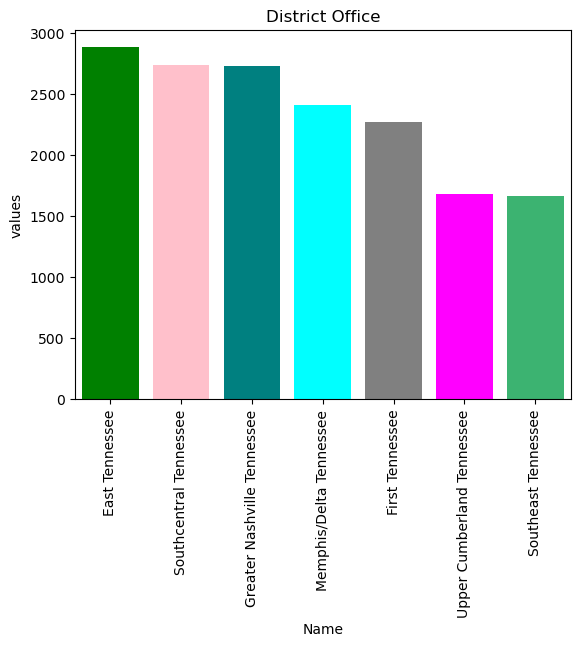

In [35]:
x = ['East Tennessee', 'Southcentral Tennessee', 'Greater Nashville Tennessee', 'First Tennessee', 'Memphis/Delta Tennessee', 'Upper Cumberland Tennessee', 'Southeast Tennessee']
h = [2882, 2742, 2727, 2409, 2270, 1680, 1664]
c = 'green', 'pink', 'teal', 'cyan', 'gray', 'magenta', 'mediumseagreen'
aeps_dd['District_office'].value_counts()[:7].plot(kind='bar')
plt.title('District Office')
plt.xlabel('Name')
plt.ylabel('values')
plt.bar(x, height = h, color = c)

Text(0, 0.5, 'values')

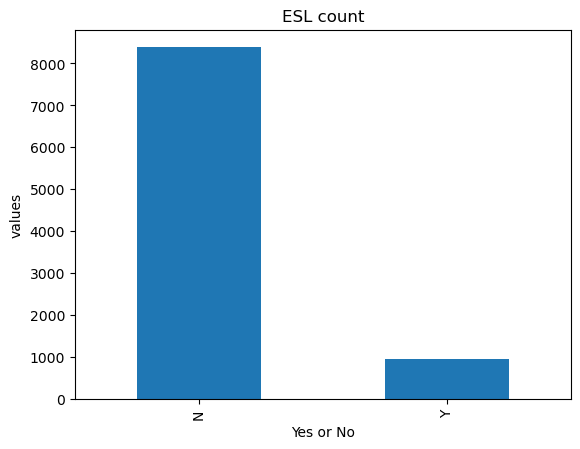

In [31]:
aeps_dd['ESL'].value_counts()[:2].plot(kind='bar')
plt.title('ESL count')
plt.xlabel('Yes or No')
plt.ylabel('values')

<BarContainer object of 5 artists>

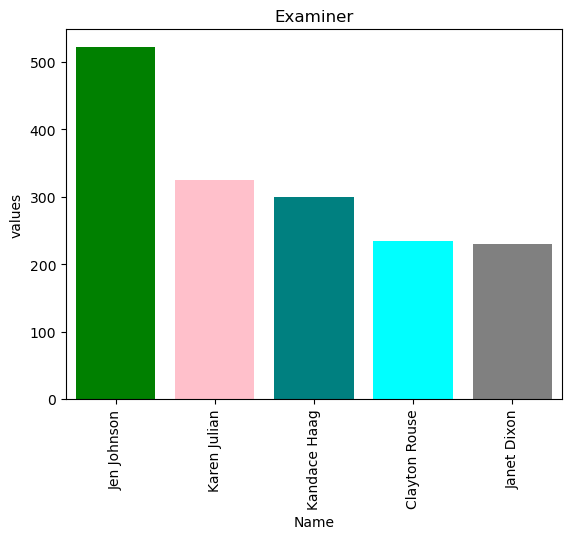

In [32]:
x = ['Jen Johnson', 'Karen Julian', 'Janet Dixon', 'Michele Valadie', 'Kristen Gilmartin Talamo']
h = [522, 324, 300, 235, 230]
c = 'green', 'pink', 'teal', 'cyan', 'gray'
aeps_dd['Examiner'].value_counts()[:5].plot(kind='bar')
plt.title('Examiner')
plt.xlabel('Name')
plt.ylabel('values')
plt.bar(x, height = h, color = c)

In [34]:
aeps_dd.columns


Index(['CHILD_ID', 'Program Name', 'AEPSi_ID', 'AssessID', 'DOB', 'Gender',
       'Dev_Status', 'AEPS_Level', 'Test_Date', 'Examiner', 'Chron_Age',
       'Service Coordinator', 'District_office', 'ESL', 'County', 'fm_B4.0',
       'fm_B5.0', 'cog_D2.0', 'cog_E2.0', 'cog_E4.0', 'cog_F1.0', 'cog_G1.0',
       'cog_G2.0', 'cog_G3.0', 'cog_G4.0', 'cog_G5.0', 'cog_G6.0', 'sc_B1.0',
       'sc_B2.0', 'sc_D1.0', 'sc_D2.0', 'sc_D3.0', 'FM_Possible_Score',
       'Cog_Possible_Score', 'SC_Possible_Score'],
      dtype='object')